In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [82]:
#Importing the dataset
df =pd.read_csv("/content/drive/MyDrive/marrakech_hotels_reviews.csv")
# look the data set
df.head()

Hotel_Name                     Review_Date  Review_Rating  \
0  72 Riad Living  Rachel R wrote a review Mar 23             50   
1  72 Riad Living   Ron N wrote a review Feb 2023             50   
2  72 Riad Living  puddu101 wrote a review Mar 22             40   
3  72 Riad Living  tephrash wrote a review Mar 18             50   
4  72 Riad Living   David T wrote a review Mar 16             50   

                         Review_Title  \
0         Lovely ambience and service   
1               Top marks well earned   
2                            An Oasis   
3       Beautiful down to the details   
4  Simply brilliant - a special place   

                                         Review_Text  \
0  I honestly couldn't fault Riad 72. The staff a...   
1  We stayed for four nights at 72 Riad Living (w...   
2  With a superb location it felt like an oasis a...   
3  Beautifully designed Riad and perfect setting ...   
4  Wow just simply delightful from the super tran...   

         Reviewer_Date_Of_Stay               Reviewer_Trip_Type  \
0     Date of stay: March 2023  Trip type: Traveled as a couple   
1  Date of stay: February 2023                              NaN   
2  Date of stay: February 2023                              NaN   
3     Date of stay: March 2023  Trip type: Traveled as a couple   
4     Date of stay: March 2023  Trip type: Traveled as a couple   

           Reviewer_Location  \
0  Edinburgh, United Kingdom   
1              Banff, Canada   
2              Mumbai, India   
3                  Singapore   
4                        NaN   

                               Reviewer_Profile_Link  
0   https://www.tripadvisor.com/Profile/rachrichmond  
1         https://www.tripadvisor.com/Profile/Gadman  
2       https://www.tripadvisor.com/Profile/puddu101  
3       https://www.tripadvisor.com/Profile/tephrash  
4  https://www.tripadvisor.com/Profile/V7829ETdavidt

In [83]:
df = df[['Review_Text','Review_Rating']]
# Mapping the review rating values to new values
rating_map = {50: 5, 40: 4, 30: 3, 20: 2, 10: 1}
df['Review_Rating'] = df['Review_Rating'].replace(rating_map)
df.columns = ['Review', 'Rating']
# remove duplicates based on "review" column
df = df.drop_duplicates(subset='Review', keep='first')
# filter rows with rating of 5
mask_5 = df['Rating'] == 5
mask_4 = df['Rating'] == 4
mask_3 = df['Rating'] == 3

# randomly remove 5000 rows with rating of 5
remove_indices_5 = np.random.choice(df[mask_5].index, size=32000, replace=False)
remove_indices_4 = np.random.choice(df[mask_4].index, size=9156, replace=False)
remove_indices_3 = np.random.choice(df[mask_3].index, size=3000, replace=False)
df = df.drop(remove_indices_5)
df = df.drop(remove_indices_4)
df = df.drop(remove_indices_3)

<ipython-input-83-bfbb874c1e90>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
# looking the shape DataSet
df.shape

(8342, 2)

- We have 20K Reviews

In [85]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8342 entries, 2 to 55357
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  8342 non-null   object
 1   Rating  8342 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 195.5+ KB


In [86]:
#checking null value 
df.isna().sum()

Review    0
Rating    0
dtype: int64

- No any missing value

In [87]:
# look  describe data set
df["Rating"].describe().round(2)

count    8342.00
mean        3.01
std         1.46
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         5.00
Name: Rating, dtype: float64

- The average a round 4 , it is good

In [88]:
# any duplicate data 
df.duplicated().sum()

0

- No any duplicate data 

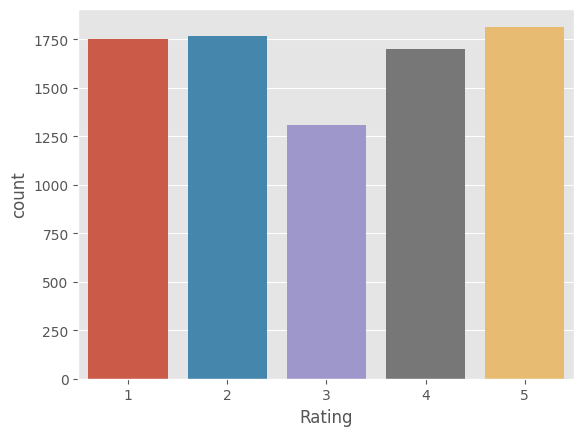

In [89]:
# how much percentage rating in the dataset

sns.countplot(x=df['Rating'])
plt.show()

In [90]:
# calculate percentage rating
percentage_rating = (df['Rating'].value_counts(normalize=True) * 100).round(2)

# print percentage rating
print('The percentage rating')
print(percentage_rating)

The percentage rating
5    21.76
2    21.18
1    20.98
4    20.38
3    15.70
Name: Rating, dtype: float64


In [91]:
# Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()

Review  Rating  Length
2   With a superb location it felt like an oasis a...       4     282
7   Just returned from a 2 night stay here. It was...       5     274
10  We went to Marrakech on a short weeks hols and...       5    1003
30  Our stay at 72 was most exemplary. From mornin...       5     894
75  My friends and I loved this riad so much it wa...       5    2199

In [92]:
# look  describe data set
df["Length"].describe().round(2)

count     8342.00
mean      1310.56
std       1291.25
min         51.00
25%        470.00
50%        908.00
75%       1664.50
max      14731.00
Name: Length, dtype: float64

<Axes: xlabel='Rating', ylabel='Length'>

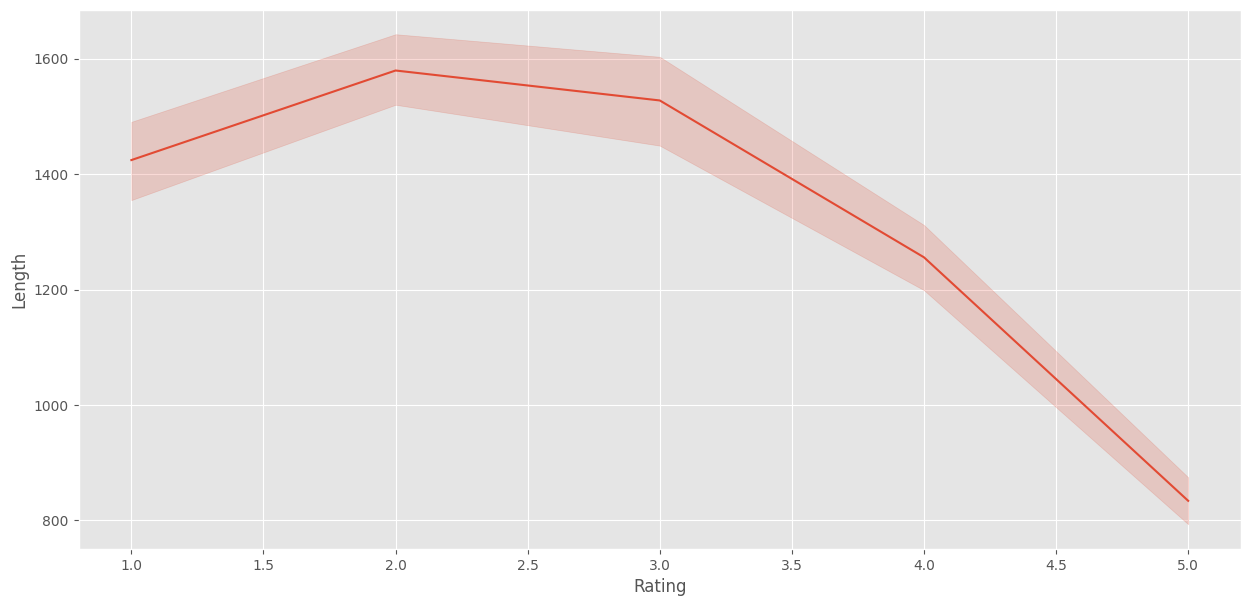

In [93]:
# graph what the the relationship between Rating and Length
plt.figure(figsize=(15,7))
sns.lineplot(data=df,x="Rating", y="Length")

In [94]:
px.scatter(df,x="Rating",y="Length", color="Rating")

- I see the length reviews has effect in the rating 

In [95]:
df_5=df[df["Rating"]==5]
df_5

Review  Rating  Length
7      Just returned from a 2 night stay here. It was...       5     274
10     We went to Marrakech on a short weeks hols and...       5    1003
30     Our stay at 72 was most exemplary. From mornin...       5     894
75     My friends and I loved this riad so much it wa...       5    2199
79     Our stay at 72 Road Living was a dream; from t...       5    1906
...                                                  ...     ...     ...
55211  My first visit to Marrakech was made particula...       5     662
55327  If you plan to visit Marrakechthis is the plac...       5    1244
55336  Villa Makassar is surely one of the most prest...       5     374
55342  I have to admit that Villa Makassar is one of ...       5     476
55357  My wife and I have just returned from a memora...       5     918

[1815 rows x 3 columns]

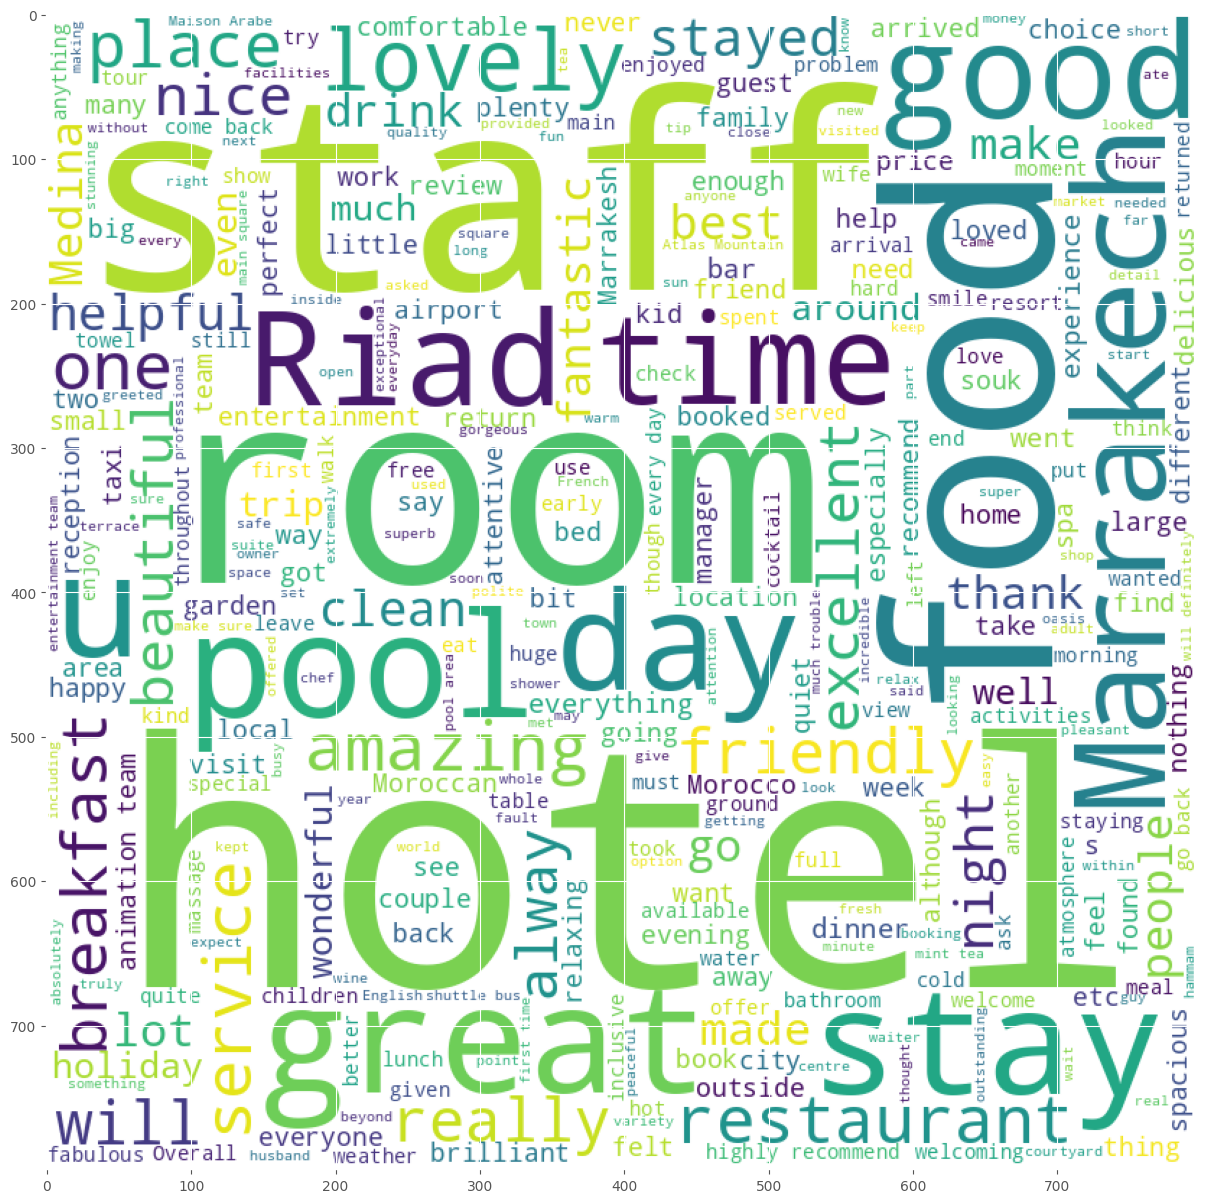

In [96]:
# the highest work repeat in the review rating 5
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

### We see the people satisfy = rating 5 in this words 
- In general the hotel - room - night  - beach - restaurant and food and drink - bed - pool  - locations. 


In [97]:
df_4=df[df["Rating"]==4]
df_4

Review  Rating  Length
2      With a superb location it felt like an oasis a...       4     282
150    We stayed here for our first trip to Marrakech...       4    1844
232    Before we arrived we had emails from the Rhiad...       4    1156
485    We had an excellent stay. We organised a trans...       4    1146
658    We stayed in this Riad for only a couple night...       4     339
...                                                  ...     ...     ...
55081  We stayed one day came in late and departed ea...       4     934
55088  Amazing customer service especially from the r...       4    1172
55133  My husband and I stayed here in February 2016 ...       4    2306
55149  We booked for a week's stay at this Riad near ...       4    2637
55267  if you need some rest in an entirely renovated...       4     398

[1700 rows x 3 columns]

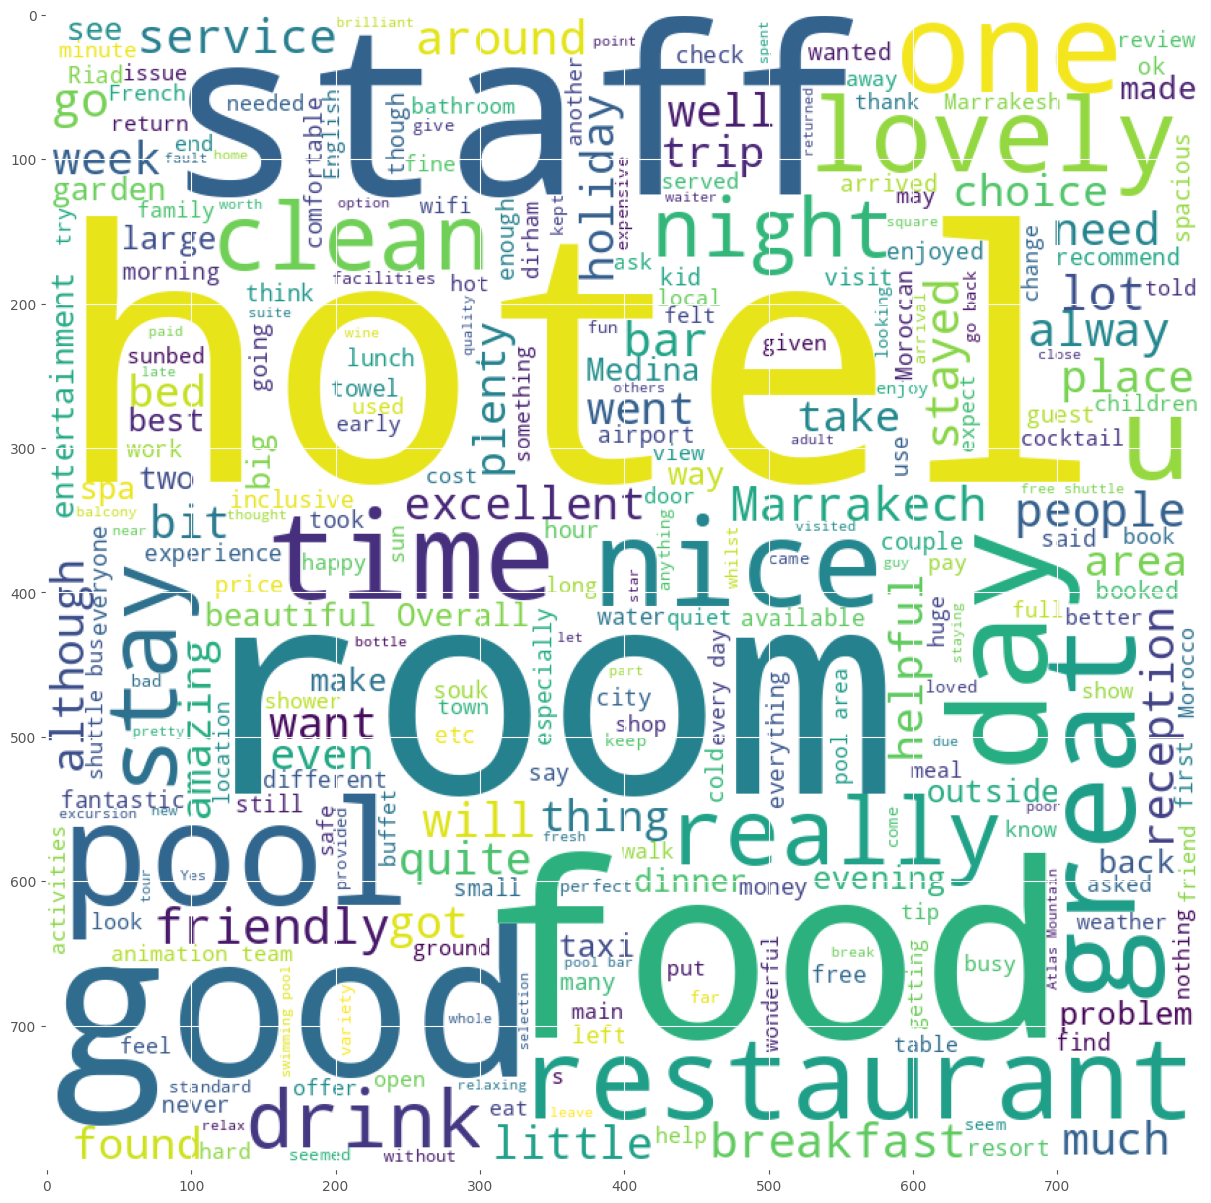

In [98]:
# the highest work repeat in the review rating 4

plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

### We see the people satisfy = rating 4  in this words the same rating 5 but plus ...
- beautiful hotel - staff friendly - service - street.


In [99]:
df_3=df[df["Rating"]==3]
df_3

Review  Rating  Length
275    I believe this riad sadly fell a little bit sh...       3    1890
828    On arrival we were greeted and shown to the wr...       3     884
852    The hotel has a good location in the old town ...       3    1321
1195   We stayed here for 4 nights at the end of augu...       3    1092
1254   Good Bits:    Weather was amazing and not too ...       3    1241
...                                                  ...     ...     ...
54808  We stayed three nights over here after a tedio...       3    1194
54810  This Marmara resort needs updating. The staff ...       3     675
54945  We stayed at the Club Marmara Madina for a ten...       3    1283
55242  Stayed here for 3 nights in April. Have mixed ...       3    5012
55351  Like the other reviewer - this hotel was booke...       3    3840

[1310 rows x 3 columns]

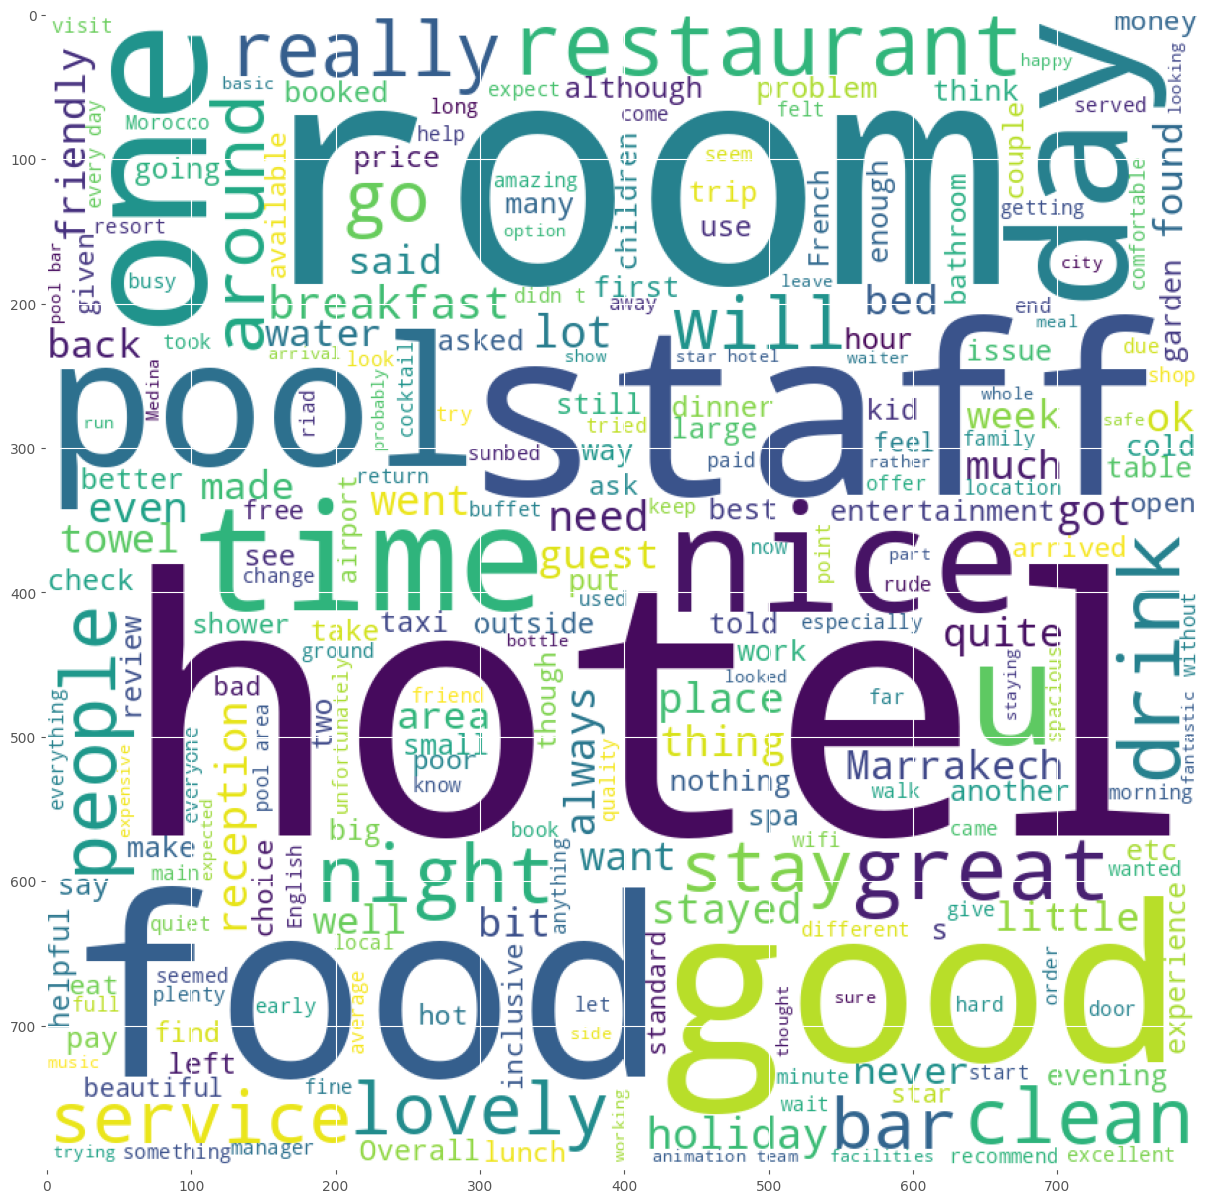

In [100]:
# the highest work repeat in the review rating 3

plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

In [101]:
df_2=df[df["Rating"]==2]
df_2

Review  Rating  Length
78     The place itself is ok. Unfortunately it’s spo...       2     271
81     The hotel room was absolutely disgusting with ...       2    1072
175    The Riad is beautiful my friends and I had an ...       2     464
694    We were little disappointed as our expectation...       2     243
907    The room we stayed was apparently nice except ...       2    1374
...                                                  ...     ...     ...
54855  Rooms were not allocated at the arrival. We ha...       2    1551
54865  Positives:  * Yehea (English speaking Rep)  * ...       2    3249
54902  Really disappointing grotty bathroom a restaur...       2     289
55117  I booked this hotel as a surprise to my husban...       2    3534
55291  The hotel is noisy the tv in our suite did not...       2     660

[1767 rows x 3 columns]

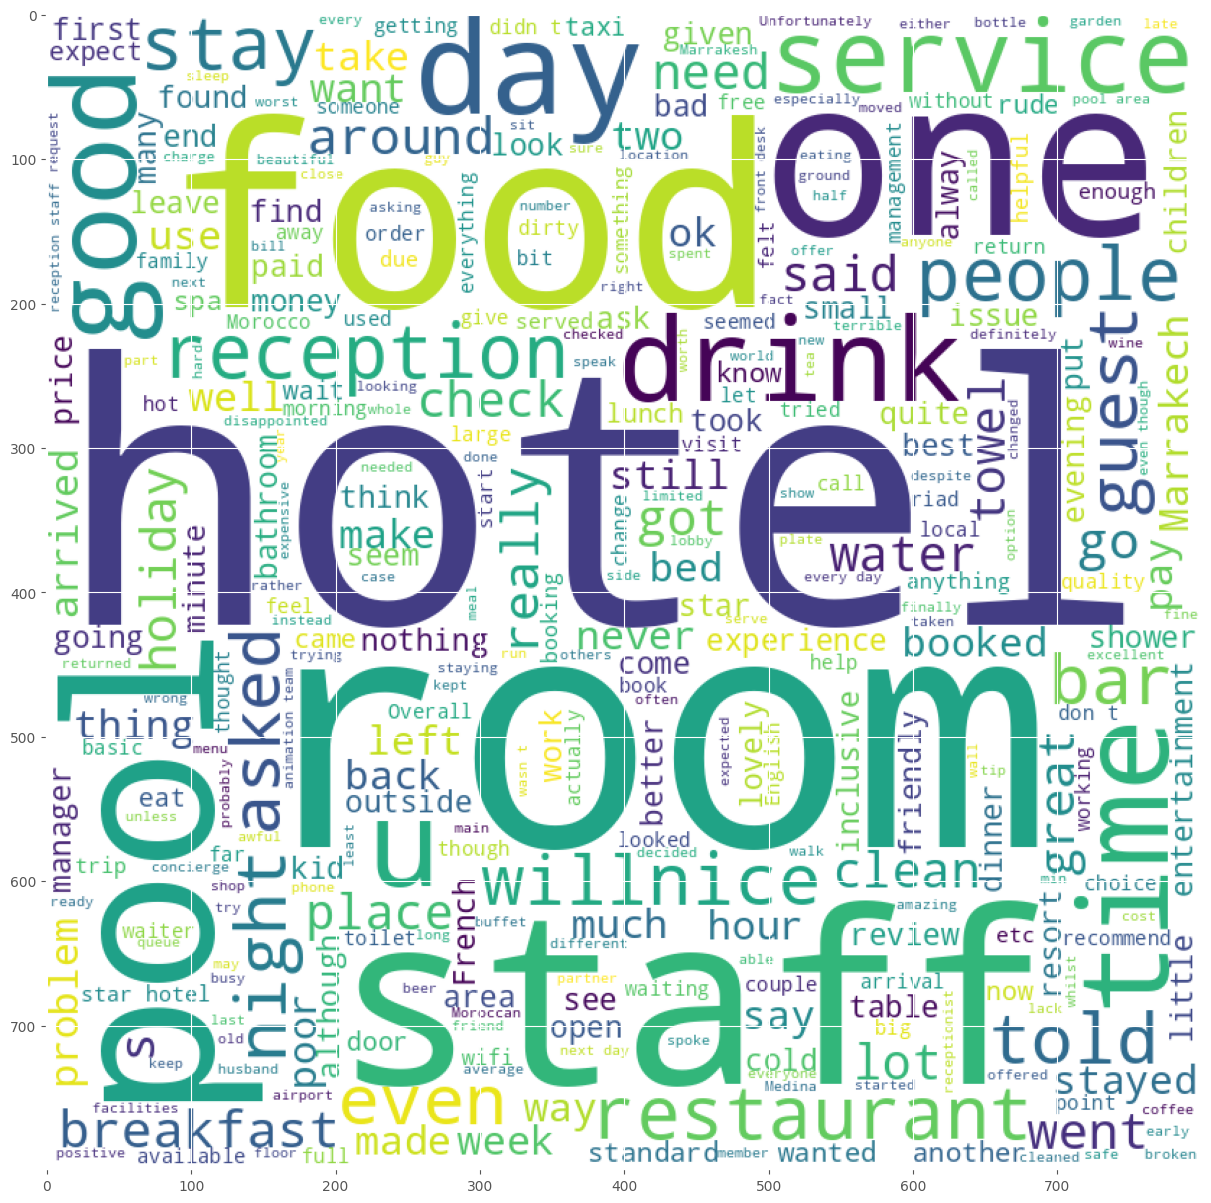

In [102]:
# the highest work repeat in the review rating 2

plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc4)

#### We see the people unsatisfied = rating 2  in this words the same rating 5 & 4 but plus ...
- Hotel - staff - beach - srevice - disk - stay - shower

In [103]:
df_1=df[df["Rating"]==1]
df_1

Review  Rating  Length
80     The staff were amazing except the Manager Stef...       1     742
707    What a shame. Riad 72 was doing so so well. Ha...       1    1177
779    I made a reservation with Riad 72 in December ...       1     545
827    I booked this hotel for my family and without ...       1     387
1010   I ben holidays in February not good people fri...       1     199
...                                                  ...     ...     ...
54896  My wife and myself stayed in Club Marmara Medi...       1    2023
54897  My partner and I have just returned from five ...       1   14526
54899  iv visited the madina club more than 7 times. ...       1     789
55026  The room was uncleab with carpet being dirty ....       1     298
55047  I and my family totalling 6 members including ...       1    2841

[1750 rows x 3 columns]

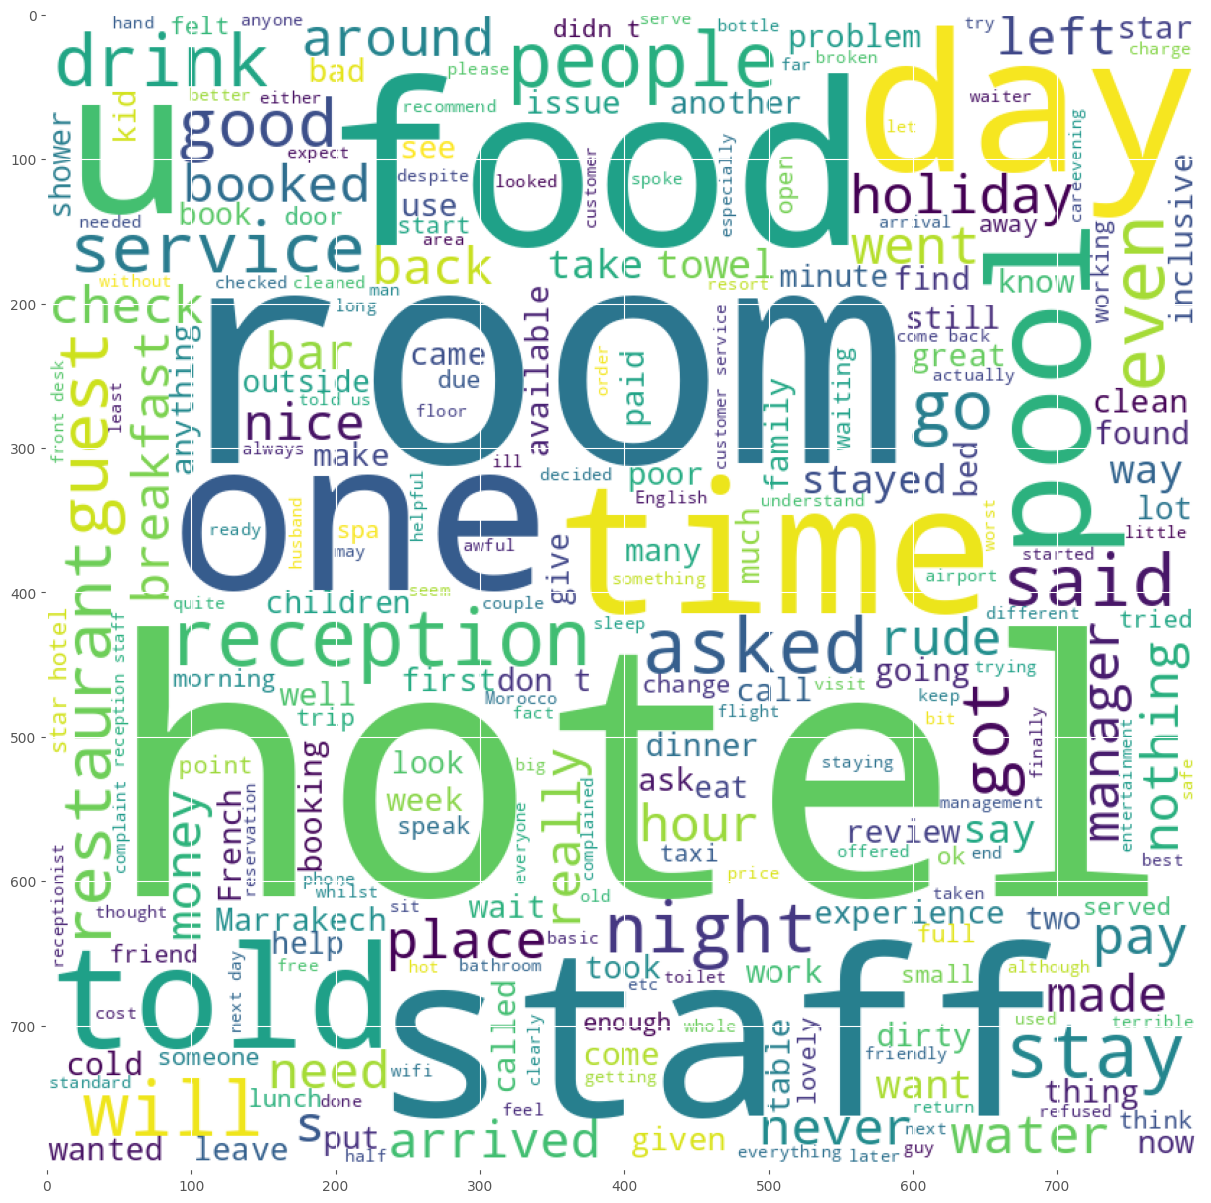

In [104]:
# the highest work repeat in the review rating 2
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc5)

# 2- Making clean text for ML & TF

In [105]:
df.head()

Review  Rating  Length
2   With a superb location it felt like an oasis a...       4     282
7   Just returned from a 2 night stay here. It was...       5     274
10  We went to Marrakech on a short weeks hols and...       5    1003
30  Our stay at 72 was most exemplary. From mornin...       5     894
75  My friends and I loved this riad so much it wa...       5    2199

In [106]:
# first review
a=df.iloc[0,0]
a

'With a superb location it felt like an oasis amidst the hustle & bustle of marrakech.  the food was excellent the bar was very well stocked & the staff very very friendly.  Accessing the rooms in the upper floors may be difficult for the elderly but it more than made up in comfort.'

- First I want making clean the first review and I will make for loop or Function

In [107]:
# import library for Natural Language Toolkit

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [108]:
# remove any symbol and cover letter to lowercase

a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['with',
 'a',
 'superb',
 'location',
 'it',
 'felt',
 'like',
 'an',
 'oasis',
 'amidst',
 'the',
 'hustle',
 'bustle',
 'of',
 'marrakech',
 'the',
 'food',
 'was',
 'excellent',
 'the',
 'bar',
 'was',
 'very',
 'well',
 'stocked',
 'the',
 'staff',
 'very',
 'very',
 'friendly',
 'accessing',
 'the',
 'rooms',
 'in',
 'the',
 'upper',
 'floors',
 'may',
 'be',
 'difficult',
 'for',
 'the',
 'elderly',
 'but',
 'it',
 'more',
 'than',
 'made',
 'up',
 'in',
 'comfort']

In [109]:
# dowmload the stopword from nlit library 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
# show what the stopwords 

sw=set(stopwords.words('english'))
print(sw)

{"wouldn't", 'if', 'so', 'hadn', "should've", "don't", 'll', 'nor', 'against', "she's", 'i', 'very', 'himself', 'yourselves', 'will', 'after', 'ma', 'where', 'their', 'does', 'couldn', "wasn't", 'just', 'itself', 'themselves', 'few', 'with', 'each', "weren't", 'further', 'once', 've', 'but', 'her', 'then', 'here', 'why', 'at', 'how', 'some', 'between', 'haven', 'herself', 'the', "doesn't", 'him', 'hasn', 'off', "it's", "mustn't", 'ours', 'aren', 'needn', 'he', 'too', 's', 'been', 'because', 'ain', 'its', 'own', 'who', "hasn't", 'there', 'shouldn', "needn't", "shan't", 'had', 'any', "you've", 'was', 'we', 'his', 'in', "aren't", 'into', 'ourselves', 'weren', 'she', 'won', 're', 'have', 'doesn', 'has', 'of', 'when', 'and', 'on', 'whom', 'under', "mightn't", 'don', 'out', 'your', 'can', 'this', 'it', 'more', 'did', 'having', 'about', 'd', 'mightn', 'isn', "you'll", "hadn't", 'wouldn', 'now', 'yours', 'for', 'to', 'y', "that'll", 'be', 'doing', 't', 'shan', "couldn't", 'are', 'from', 'our',

In [111]:
# made loop for clean reviews - based on the stopwords

clean_word=[i for i in a if not i in sw]
clean_word

['superb',
 'location',
 'felt',
 'like',
 'oasis',
 'amidst',
 'hustle',
 'bustle',
 'marrakech',
 'food',
 'excellent',
 'bar',
 'well',
 'stocked',
 'staff',
 'friendly',
 'accessing',
 'rooms',
 'upper',
 'floors',
 'may',
 'difficult',
 'elderly',
 'made',
 'comfort']

In [112]:
# now I need make sentence - list 
sen=' '.join(clean_word)
sen

'superb location felt like oasis amidst hustle bustle marrakech food excellent bar well stocked staff friendly accessing rooms upper floors may difficult elderly made comfort'

In [113]:
# defined function for clean all reviews in the data set


def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [114]:
# add new column about the reviews after cleaning

df['clean_word']=df["Review"].apply(text_preprocessing)
df.head()


Review  Rating  Length  \
2   With a superb location it felt like an oasis a...       4     282   
7   Just returned from a 2 night stay here. It was...       5     274   
10  We went to Marrakech on a short weeks hols and...       5    1003   
30  Our stay at 72 was most exemplary. From mornin...       5     894   
75  My friends and I loved this riad so much it wa...       5    2199   

                                           clean_word  
2   superb locat felt like oasi amidst hustl bustl...  
7   return night stay absolut love staff super att...  
10  went marrakech short week hol decid stay tradi...  
30  stay exemplari morn night staff graciou prompt...  
75  friend love riad much hard leav truli peac oas...

In [115]:
# Length of word in sentence
df['Length 2'] = df['clean_word'].apply(len)
df.head()

Review  Rating  Length  \
2   With a superb location it felt like an oasis a...       4     282   
7   Just returned from a 2 night stay here. It was...       5     274   
10  We went to Marrakech on a short weeks hols and...       5    1003   
30  Our stay at 72 was most exemplary. From mornin...       5     894   
75  My friends and I loved this riad so much it wa...       5    2199   

                                           clean_word  Length 2  
2   superb locat felt like oasi amidst hustl bustl...       156  
7   return night stay absolut love staff super att...       151  
10  went marrakech short week hol decid stay tradi...       560  
30  stay exemplari morn night staff graciou prompt...       491  
75  friend love riad much hard leav truli peac oas...      1267

In [116]:
df.describe().round(2)

Rating    Length  Length 2
count  8342.00   8342.00   8342.00
mean      3.01   1310.56    703.64
std       1.46   1291.25    677.94
min       1.00     51.00     39.00
25%       2.00    470.00    263.00
50%       3.00    908.00    493.00
75%       4.00   1664.50    890.00
max       5.00  14731.00   7742.00

- We see the length reviews less

# 3- Building a Machine Learning Model / classification


In [117]:
#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler


In [118]:
# now we need change the new word to number - array using CountVectorizer

cv=CountVectorizer()
X=cv.fit_transform(df["clean_word"]).toarray()
y=df["Rating"]

In [119]:
# the shape
print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (8342, 18627)
y: shape  (8342,)


In [120]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (6256, 18627)
X Test  :  (2086, 18627)
Y Train :  (6256,)
Y Test  :  (2086,)


In [121]:
#Defined object from library classification 

LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [122]:
# make for loop for classification 

li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 54.31447746883988
DecisionTreeClassifier() : 38.782358581016304
RandomForestClassifier() : 51.10258868648131
KNeighborsClassifier() : 37.919463087248324
MultinomialNB() : 57.670182166826464


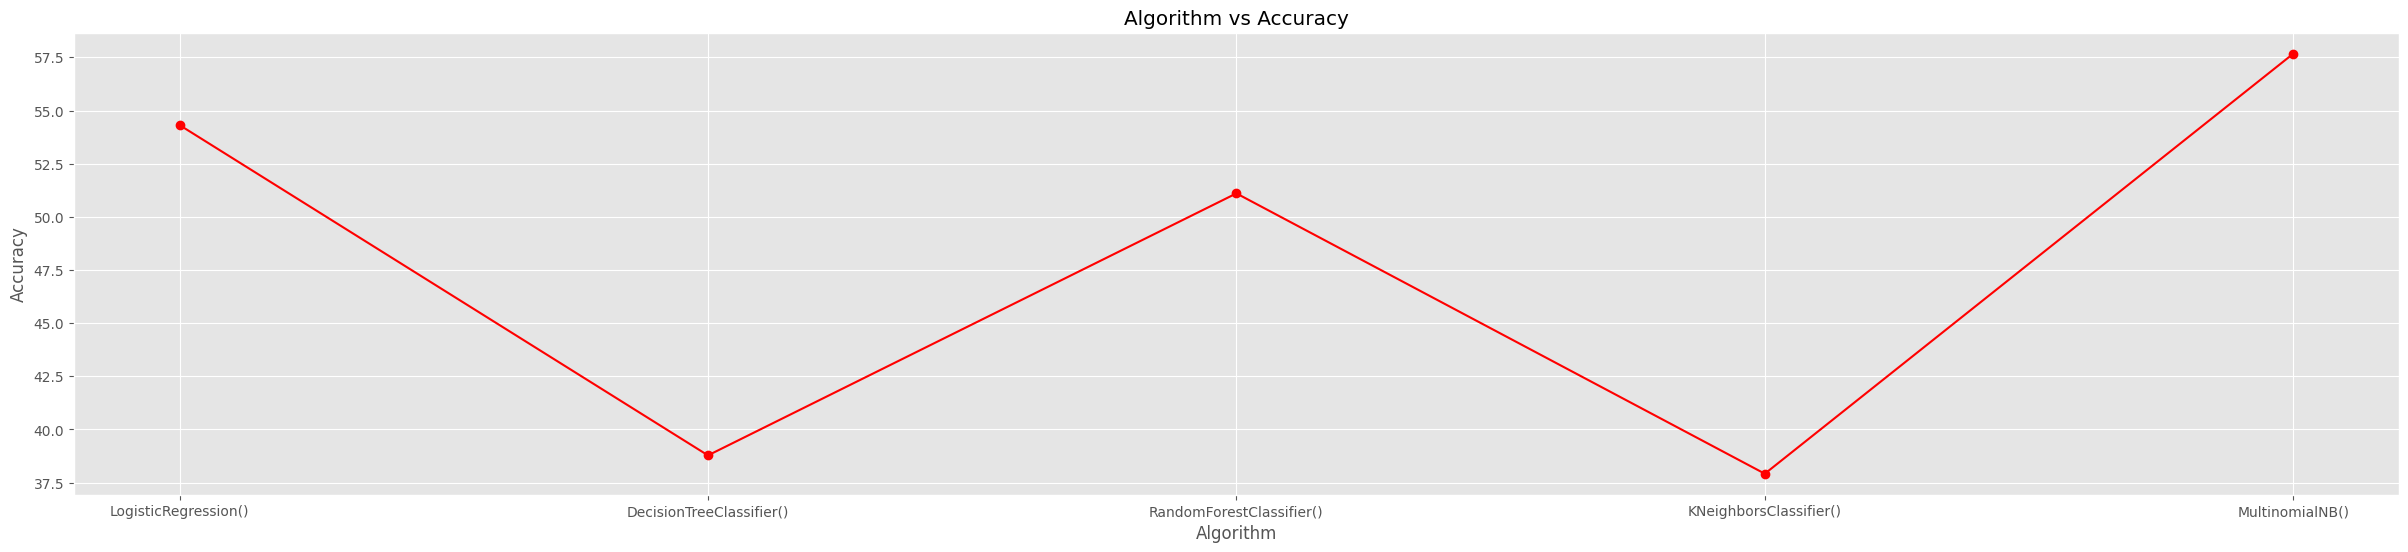

In [123]:
# make graph about Accuracy

plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()